# On the Effectiveness of ToMATo in Cluster Analysis on Large and Challenging Datasets

# Introduction

Since time immemorial, the human race has been faced with problems of finding patterns between objects, grouping like objects together, and separating unlike objects. From leaving a child in a sandbox with a few toys, to a marketing agency grouping up consumers based on their preferences, these problems appear time and time again in our daily lives.

Cluster analysis, or the act of grouping up data together based on similarity, is the manifestation of this idea in data mining and machine learning. There are many known algorithms available to accomplish this task, yet due to their idiosyncrasies and the infinite possible variations in data, each of them have their own use case. Relationships need not be linear, geometries need not be flat, trends may be small or large, distances need not be Euclidean, the list goes on and on. Different algorithms perform better on different datasets, and there is no one-size-fits-all algorithm available. 

Yet, in recent years, a new approach to cluster analysis has emerged. Said approach uses methods derived from the field of mathematics known as algebraic topology, and is part of the larger approach to data analysis known as topological data analysis. This approach is known as persistent homology, with the key idea of examining how persistent certain features in the dataset are, under a variation of parameters. Should features stay present throughout a wide range of parameters, they are deemed to be significant <cite data-cite="8504090/Q45AQFG6"></cite>. This bodes well for efforts to analyze datasets normally deemed "challenging," due to some of the aforementioned characteristics in the previous paragraph.

One approach related to the concept of persistence is known as the Topological Mode Analysis Tool (ToMATo) <cite data-cite="undefined"></cite>. We compare this to other, more well-established algorithms, including k-means <cite data-cite="8504090/RWC68626"></cite> and the Density-Based Spatial Clustering of Applications with Noise (DBSCAN) algorithm <cite data-cite="8504090/JFXN32WV"></cite>.

Our research question is as such: **How effective is ToMATo when dealing with large and challenging datasets?** In the following section, the literature review, we survey existing literature regarding the algorithms we will explore and their effectiveness, and provide demonstrations in order to demonstrate a rudimentary illustration of the benefits and shortcomings outlined in the literature.

# Literature Review

## Importing Packages and Libraries

In examining the existing literature, with some of the classical and non-classical algorithms available for cluster analysis, we import the Scikit-learn library <cite data-cite="8504090/9ELQVJQ8"></cite>, and create demonstrations inspired by some examples of theirs. Plotting tools include the Matplotlib library <cite data-cite="8504090/5D2QY8S7"></cite>, and a style sheet called Gadfly <cite data-cite="8504090/HG7HCYNR"></cite>. The NumPy numerical analysis library <cite data-cite="8504090/MURQI7EA"></cite>, the tomaster implementation of ToMATo <cite data-cite="8504090/NVBGRJBN"></cite>, are used here. Live CSL citations are generated by the cite2c extension <cite data-cite="8504090/ZI5Y4SXG"></cite>.

In [1]:
from sklearn import datasets, cluster
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import kmapper as km
import matplotlib
plt.style.use('matplotlibrc')
%matplotlib inline

n_samples = 2000

circles = datasets.make_circles(n_samples, noise=0.05, factor=0.5)
moons = datasets.make_moons(n_samples, 0.05)
varied = datasets.make_blobs(n_samples, cluster_std=[
                             1.0, 2.5, 0.5], random_state=170)

blobs = datasets.make_blobs(n_samples, random_state=170)
aniso = (np.dot(blobs[0], [[0.6, -0.6], [-0.4, 0.8]]), blobs[1])

## Overview of Existing Literature

In this paper, we will examine three algorithms in total. The last one is the focus of the paper, while the former two are used as comparison tools. The former two happen to be the only two of the more classical algorithms recommended by Scikit-learn <cite data-cite="8504090/9ELQVJQ8"></cite> for very large datasets, as pointed out by a group of researchers discussing why DBSCAN is still a viable clustering algorithm <cite data-cite="8504090/TKK84HY7"></cite>.
1. k-means
2. DBSCAN
3. ToMATo

The first two are more well-established, and approach the problems from perspectives unrelated to persistence. The last uses an approach rooted in persistence and algebraic topology. Briefly, 

| Algorithm      | Description | Core Idea | Characteristics |
| :----------- | :----------- | :----------- | :----------- |
| k-means      | Create n "centroids" for the data at random. Assign each data point to its closest centroid. Update centroids to be the mean location of the data points assigned to it. Repeat <cite data-cite="8504090/WEUA8VFV"></cite>.       | Assigning data points to clusters based on how close they are to their centers. |  Very simple. Relatively evenly-sized convex (or circular) clusters <cite data-cite="8504090/9ELQVJQ8"></cite>.  Fast, linear-time in practice <cite data-cite="8504090/SMA7VIC8"></cite>. |
| DBSCAN   | For each data point $A$, expand the cluster containing it through assigning all other unclassified points to the cluster if they is within a certain distance $\epsilon$ from it, and there are greater than $minPts$ points within $\epsilon$ from $A$. Recursively, do the same for every point $B$ added to the first-level cluster with $A$, and every data point added to the second-level cluster with $B$, and so on <cite data-cite="8504090/9ELQVJQ8"></cite>.   | Clustering nearby points in areas of high-enough density.  | Clusters of any shape, potentially uneven sizes, suitable for non-Euclidean geometry <cite data-cite="8504090/9ELQVJQ8"></cite>. Points in areas of low density classified as noise (potentially wrongly). Speed concerns, log-linear average-case <cite data-cite="8504090/JFXN32WV"></cite>, quadratic worse-case <cite data-cite="8504090/5Y9E5QRY"></cite>.   
| ToMATo | Estimate the density of the data, find the most persistent/prominent density peaks and make each a "head" of a cluster, merge significantly less-prominent peaks into the clusters of the most prominent ones <cite data-cite="undefined"></cite>.  |  Merge clusters/points of less prominence into those of more prominence. | Clusters of any shape and size, flexible, generic, suitable for non-Euclidean geometry. Responds well to hierarchical datasets, unlike DBSCAN. Fast, almost-linear time in the worst case <cite data-cite="undefined"></cite>. |

We will examine literature on the effectiveness of the algorithms in this order, with a special emphasis on ToMATo. 

## K-Means

k-means was introduced by Stuart P. Lloyd in 1957 as a method for pulse-code modulation <cite data-cite="8504090/RWC68626"></cite>. Since then, the algorithm itself has been adopted and repurposed for use in fields from finance <cite data-cite="8504090/4SYXDXCA"></cite> to fishing <cite data-cite="8504090/PHMM4QJE"></cite>. Simple enough to be taught in introductory machine learning classes and very quick after accelerations have been achieved <cite data-cite="8504090/GV5L894J"></cite>, it has achieved widespread acceptance and usage across many fields. However, the algorithm is not without its problems. 

Ortega et. al., in a paper titled "Research issues on K-means Algorithm: An Experimental Trial Using Matlab," effectively summarizes the algorithm itself, its advantages and disadvantages, presents a very brief introduction on many papers on proposed improvements to the algorithm, and finally conducts an experimental trial in Matlab. The trial was done in order to "establish a framework for a proposed improvement to the standard k-means algorithm." <cite data-cite="8504090/WEUA8VFV"></cite>

The primary value of the paper by Ortega et. al. to us lies within the brief introduction to the works of other authors on proposed improvements to the algorithm in table form. In doing so, the authors provide a list of issues and shortcomings with the k-means algorithm, simultaneously allowing for easy access to both a list of issues and attempts to solve them. This list includes:

1. Sensitivity to initial conditions
2. Only converging to a local optimum
3. Sensitivity to outliers and noise
4. Only applicable to numerical variables


However, this list is not exhaustive, and fails to include limitations and common characteristics of results obtained by k-means, such as that of requiring evenly-sized convex clusters <cite data-cite="8504090/9ELQVJQ8"></cite>, a key concern in our analysis of challenging datasets. This such omission is unfortunate, curtailing its use to our analysis. Regardless, the work done by Ortega et. al. is still very helpful in that we are able to understand (1) what areas an alternative algorithm should improve on with regard to the shortcomings k-means displays, and (2) why we need an alternative algorithm that is suitable for use on large datasets.

Text(0.5, 1.0, 'Stretched Blobs')

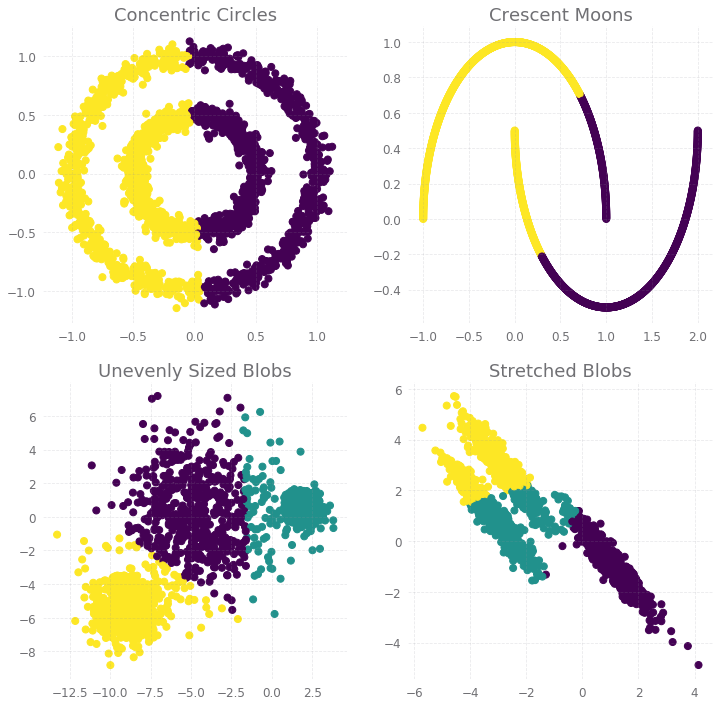

In [2]:
plt.figure(figsize=(12, 12))

y_pred = cluster.KMeans(n_clusters=2).fit_predict(circles[0])
plt.subplot(221)
plt.scatter(circles[0][:, 0], circles[0][:, 1], c=y_pred)
plt.title("Concentric Circles")

y_pred = cluster.KMeans(n_clusters=2).fit_predict(moons[0])
plt.subplot(222)
plt.scatter(moons[0][:, 0], moons[0][:, 1], c=y_pred)
plt.title("Crescent Moons")

y_pred = cluster.KMeans(n_clusters=3).fit_predict(varied[0])
plt.subplot(223)
plt.scatter(varied[0][:, 0], varied[0][:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

y_pred = cluster.KMeans(n_clusters=3).fit_predict(aniso[0])
plt.subplot(224)
plt.scatter(aniso[0][:, 0], aniso[0][:, 1], c=y_pred)
plt.title("Stretched Blobs")

## DBSCAN

DBSCAN (and its variants and offshoots) is a classical algorithm that, according to Akbar and Khan, deals very well with non-convex shaped data, and uneven cluster sizes <cite data-cite="8504090/5Y9E5QRY"></cite>. In their survey of existing literature, titled "Critical Analysis of Density-based Spatial Clustering of Applications with Noise (DBSCAN) Techniques," Akbar and Khan highlight the drawbacks that DBSCAN faces, and discuss a few alternate versions of the algorithm that supposedly resolve some of these drawbacks. 

The three main shortcomings that Akbar and Khan highlight are (1) DBSCAN's $O(n^2)$ worst-case time complexity, (2) DBSCAN's inability to deal with clusters of different densities, and (3) the difficulty in setting the algorithm's input parameters. Akbar and Khan succinctly summarize the various approaches other researchers have taken in trying to alleviate these concerns, but conclude that "each variation still has drawbacks" <cite data-cite="8504090/5Y9E5QRY"></cite> 



A corollary of a shortcoming of DBSCAN mentioned by Akbar and Khan lies in its tendency to disregard points in locations with low density as noise. Such points are not necessarily noise, however, as we can see below in the `Stretched Blobs` plot. 

Text(0.5, 1.0, 'Stretched Blobs')

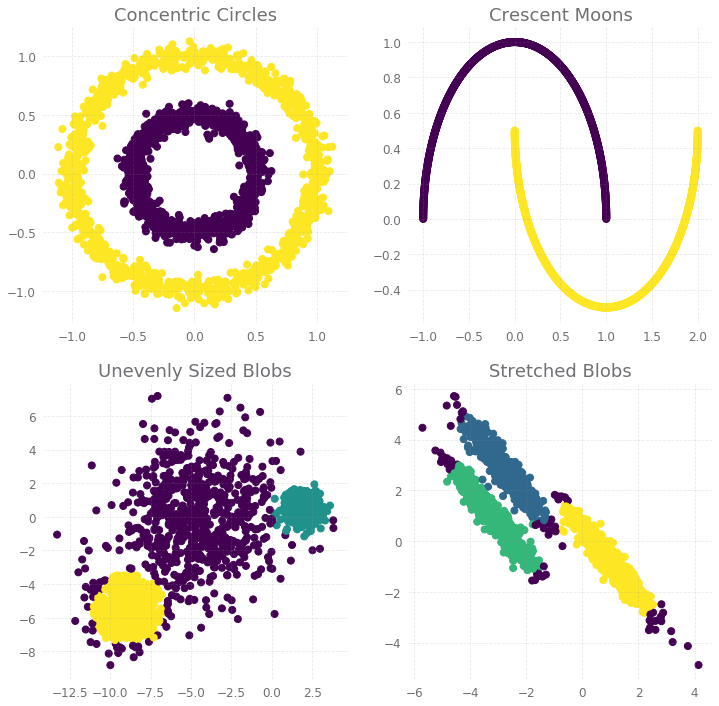

In [3]:
plt.figure(figsize=(12, 12))

y_pred = cluster.DBSCAN(eps=0.2, min_samples=50).fit_predict(circles[0])
plt.subplot(221)
plt.scatter(circles[0][:, 0], circles[0][:, 1], c=y_pred)
plt.title("Concentric Circles")

y_pred = cluster.DBSCAN(eps=0.2, min_samples=50).fit_predict(moons[0])
plt.subplot(222)
plt.scatter(moons[0][:, 0], moons[0][:, 1], c=y_pred)
plt.title("Crescent Moons")

y_pred = cluster.DBSCAN(eps=0.7, min_samples=50).fit_predict(varied[0])
plt.subplot(223)
plt.scatter(varied[0][:, 0], varied[0][:, 1], c=y_pred)
plt.title("Unevenly Sized Blobs")

y_pred = cluster.DBSCAN(eps=0.5, min_samples=50).fit_predict(aniso[0])
plt.subplot(224)
plt.scatter(aniso[0][:, 0], aniso[0][:, 1], c=y_pred)
plt.title("Stretched Blobs")

0 8.022628091714896 1
0 4.011314045857448 2
0 2.005657022928724 2


Text(0.5, 1.0, 'Stretched Blobs')

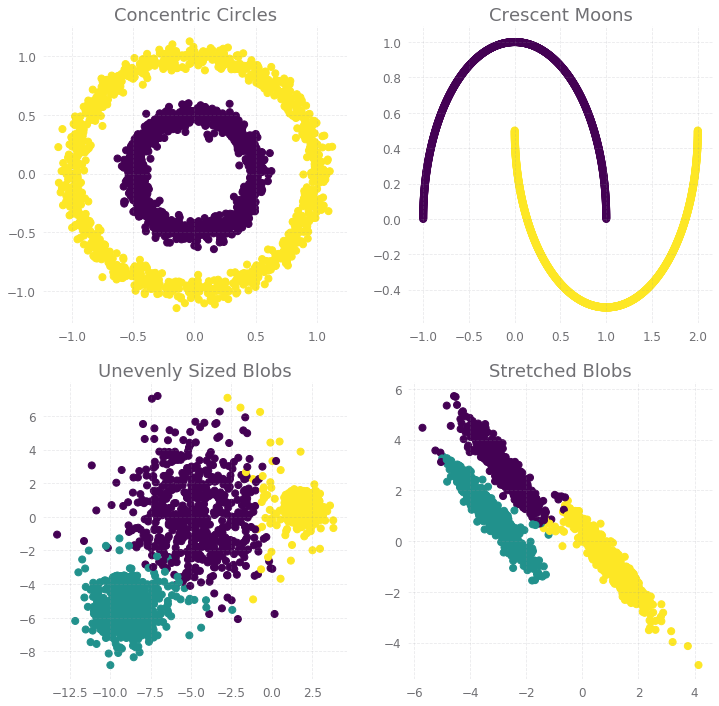

In [4]:
plt.figure(figsize=(12, 12))


y_pred = tomato(circles[0], k=50, n_clusters=2)
plt.subplot(221)
plt.scatter(circles[0][:, 0], circles[0][:, 1], c=y_pred[0])
plt.title("Concentric Circles")

y_pred = tomato(moons[0], k=50, n_clusters=2)
plt.subplot(222)
plt.scatter(moons[0][:, 0], moons[0][:, 1], c=y_pred[0])
plt.title("Crescent Moons")

y_pred = tomato(varied[0], k=50, n_clusters=3)
plt.subplot(223)
plt.scatter(varied[0][:, 0], varied[0][:, 1], c=y_pred[0])
plt.title("Unevenly Sized Blobs")

y_pred = tomato(aniso[0], k=50, n_clusters=3)
plt.subplot(224)
plt.scatter(aniso[0][:, 0], aniso[0][:, 1], c=y_pred[0])
plt.title("Stretched Blobs")

# Bibliography

<div class="cite2c-biblio"></div>